In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df.shape

(10000, 14)

In [83]:
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values


In [84]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

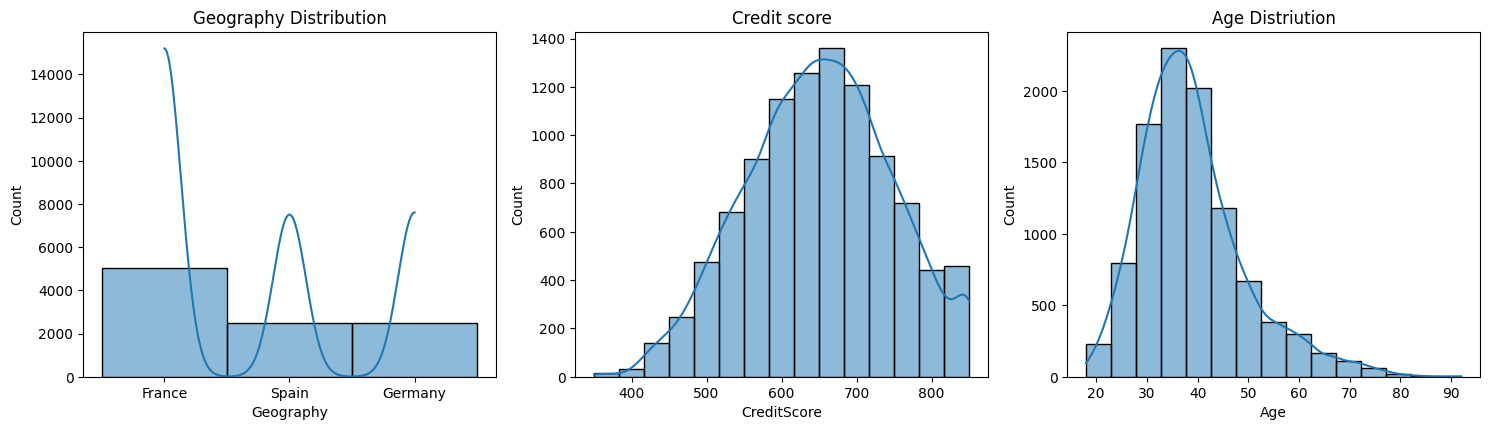

In [85]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.histplot(df['Geography'],bins=15,kde=True)
plt.title('Geography Distribution')

plt.subplot(2,3,2)
sns.histplot(df['CreditScore'],bins=15,kde=True)
plt.title("Credit score")

plt.subplot(2,3,3)
sns.histplot(df['Age'],bins=15,kde=True)
plt.title("Age Distriution")

plt.tight_layout()
plt.show()

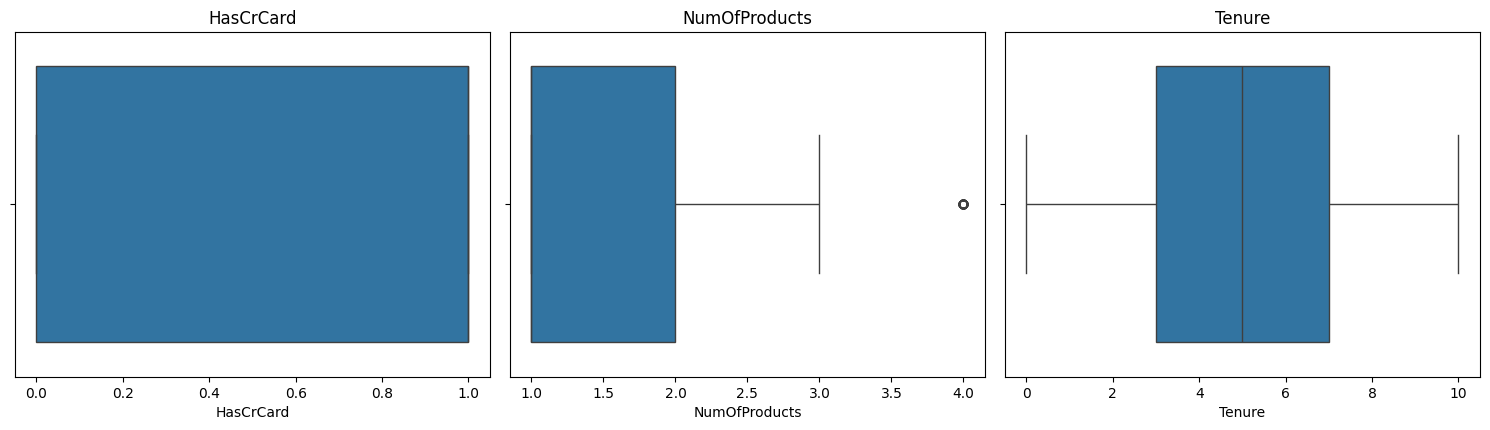

In [86]:
plt.figure(figsize=(15,8))

data = df[['HasCrCard','NumOfProducts','Tenure']]

for i ,col in enumerate(data,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


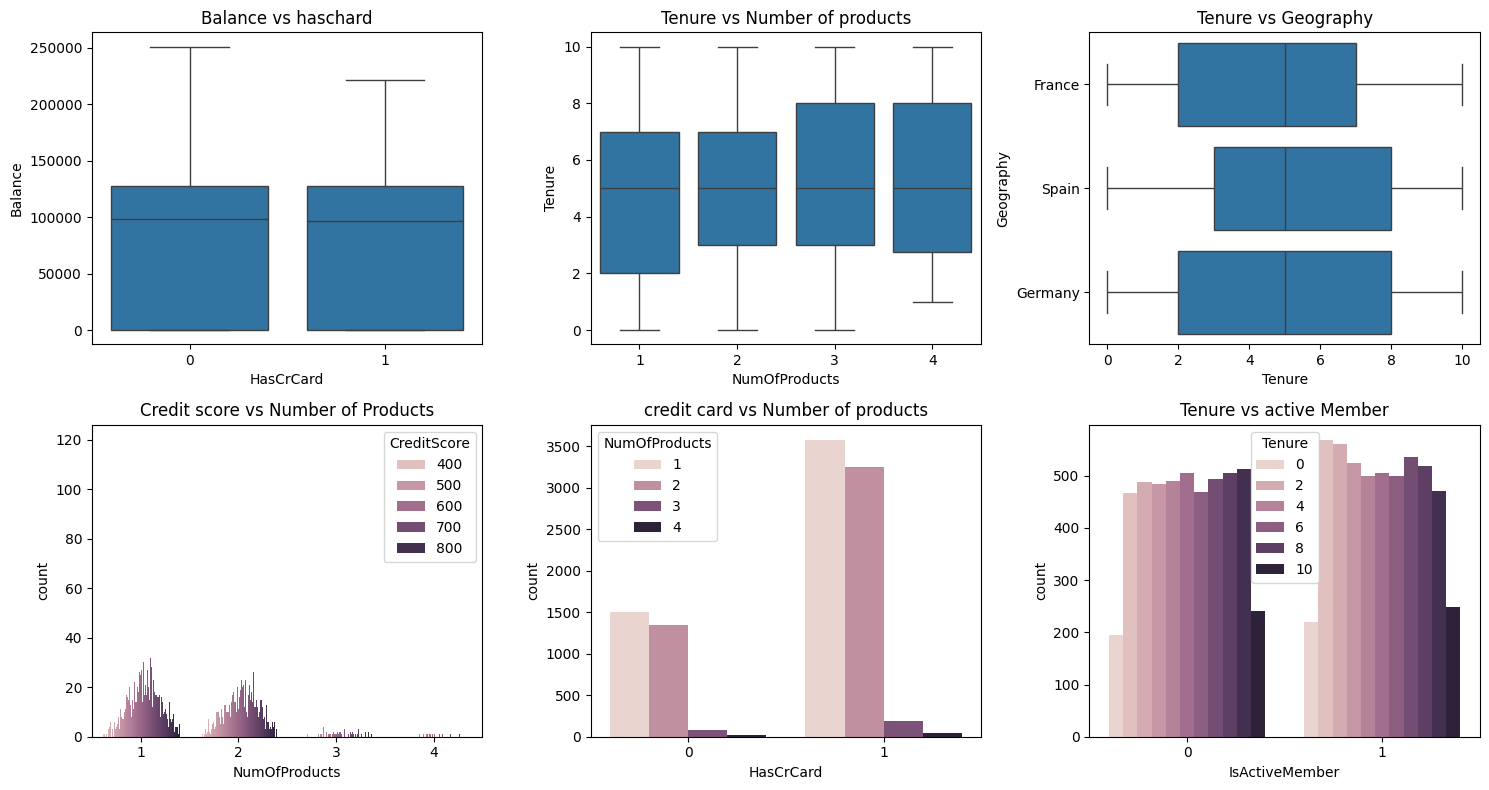

In [87]:
plt.figure(figsize=(15,8))


plt.subplot(2,3,1)
sns.boxplot(data=df,x=df['HasCrCard'],y=df['Balance'])
plt.title('Balance vs haschard')

plt.subplot(2,3,2)
sns.boxplot(df,x=df['NumOfProducts'],y=df['Tenure'])
plt.title('Tenure vs Number of products')

plt.subplot(2,3,3)
sns.boxplot(df,x=df['Tenure'],y=df['Geography'])
plt.title('Tenure vs Geography')

plt.subplot(2,3,4)
sns.countplot(df,x=df['NumOfProducts'],hue=df['CreditScore'])
plt.title('Credit score vs Number of Products')

plt.subplot(2,3,5)
sns.countplot(df,x=df['HasCrCard'],hue=df['NumOfProducts'])
plt.title('credit card vs Number of products')

plt.subplot(2,3,6)
sns.countplot(df,x=df['IsActiveMember'],hue=df['Tenure'])
plt.title('Tenure vs active Member')

plt.tight_layout()
plt.show()

In [88]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

from sklearn.compose import ColumnTransformer

In [89]:
le = LabelEncoder()

X[:,2] = le.fit_transform(X[:,2])

ct = ColumnTransformer(transformers=[(
    'encoder',OneHotEncoder(sparse_output=False),[1]
)],remainder='passthrough')
print(ct)
X = ct.fit_transform(X)
X

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(sparse_output=False),
                                 [1])])


array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [90]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train,X_test

(array([[ 1.00150113, -0.57946723, -0.57638802, ...,  0.64920267,
          0.97481699,  1.36766974],
        [-0.99850112,  1.72572313, -0.57638802, ...,  0.64920267,
          0.97481699,  1.6612541 ],
        [-0.99850112, -0.57946723,  1.73494238, ...,  0.64920267,
         -1.02583358, -0.25280688],
        ...,
        [ 1.00150113, -0.57946723, -0.57638802, ..., -1.54035103,
         -1.02583358, -0.1427649 ],
        [ 1.00150113, -0.57946723, -0.57638802, ...,  0.64920267,
         -1.02583358, -0.05082558],
        [-0.99850112,  1.72572313, -0.57638802, ...,  0.64920267,
          0.97481699, -0.81456811]]),
 array([[-0.99850112,  1.72572313, -0.57638802, ..., -1.54035103,
         -1.02583358, -1.01960511],
        [ 1.00150113, -0.57946723, -0.57638802, ...,  0.64920267,
          0.97481699,  0.79888291],
        [-0.99850112, -0.57946723,  1.73494238, ...,  0.64920267,
         -1.02583358, -0.72797953],
        ...,
        [ 1.00150113, -0.57946723, -0.57638802, ...,  

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout

In [93]:
def Built_Model(Input_Shape):
    model = Sequential([
        Input(shape=Input_Shape),
        Dense(64,activation='relu'),
        Dropout(0.5),
        Dense(32,activation='relu'),
        Dropout(0.5),
        Dense(1,activation='sigmoid')
    ])
    return model

InputShape = (X_train.shape[1],)
model = Built_Model(InputShape)
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [94]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [96]:
history = model.fit(
    X_train,y_train,epochs = 200,
    batch_size = 32,
    validation_split = 0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7240 - loss: 0.5713 - val_accuracy: 0.8031 - val_loss: 0.4346
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7898 - loss: 0.4874 - val_accuracy: 0.8075 - val_loss: 0.4257
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7917 - loss: 0.4812 - val_accuracy: 0.8075 - val_loss: 0.4191
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7915 - loss: 0.4681 - val_accuracy: 0.8213 - val_loss: 0.4132
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8106 - loss: 0.4535 - val_accuracy: 0.8331 - val_loss: 0.4070
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8066 - loss: 0.4485 - val_accuracy: 0.8369 - val_loss: 0.3989
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8143 - loss: 0.4361 - val_accuracy: 0.8431 - val_loss: 0.3889
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8231 - loss: 0.4191 - val_accu

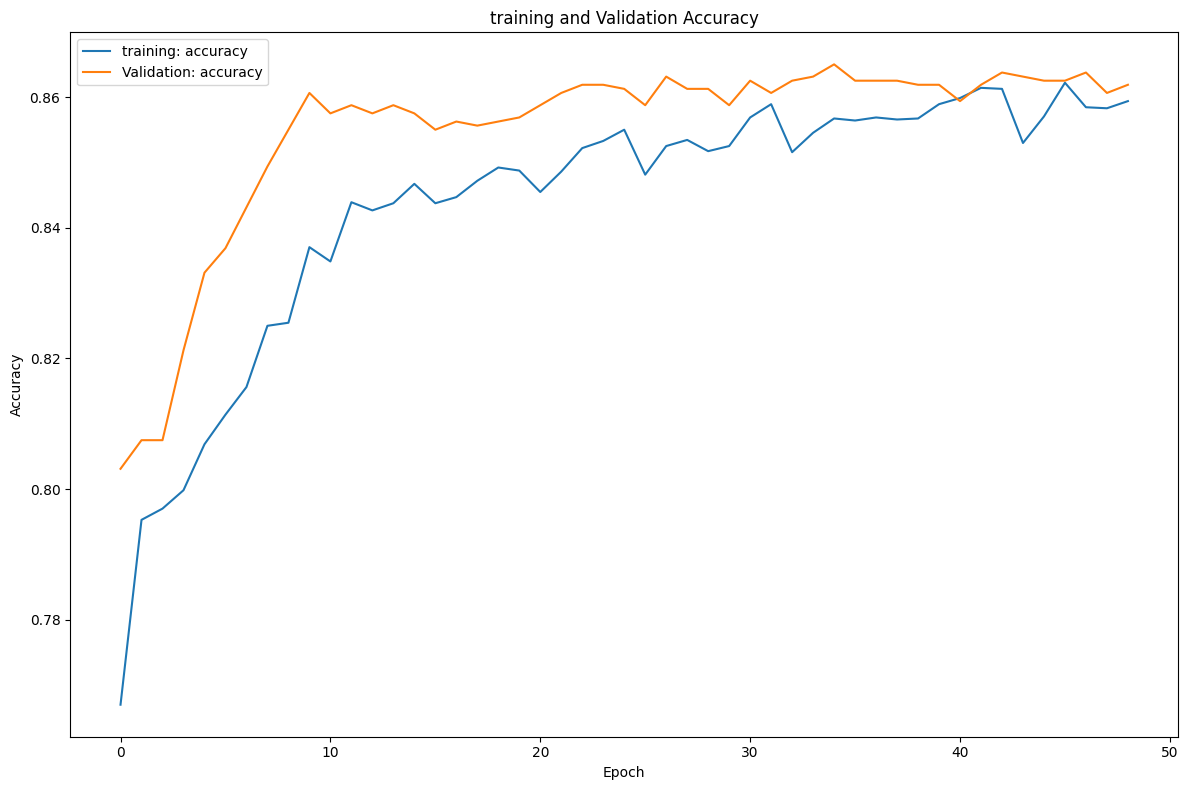

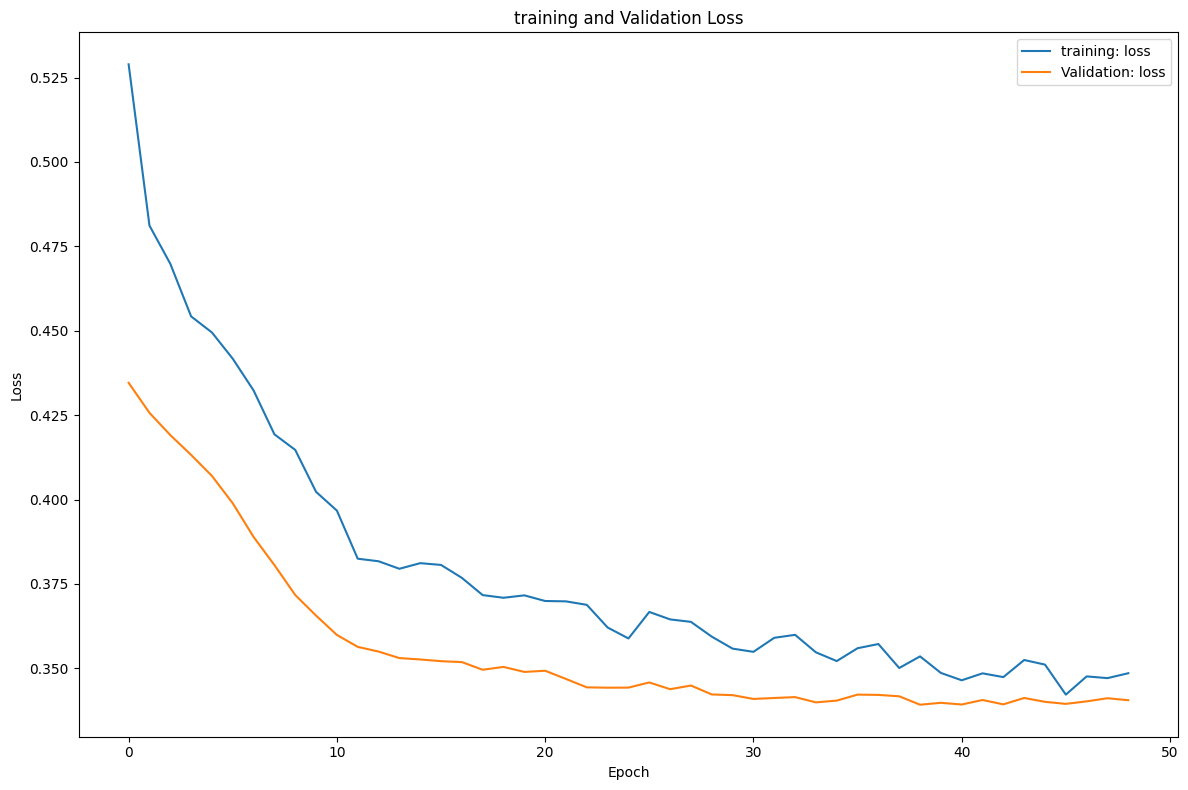

In [97]:
def plot_history(history,metric):
    plt.figure(figsize=(12,8))
    plt.plot(history.history[metric],label = f"training: {metric}")
    plt.plot(history.history[f"val_{metric}"],label = f"Validation: {metric}")
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.title(f"training and Validation {metric.capitalize()}")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

plot_history(history,'accuracy')
plot_history(history,'loss')

In [98]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.3358
Test Loss: 0.3357
Test accuracy: 0.8595


In [99]:
p1 = model.predict(scaler.transform([[0,0,1,608,0,41,1,83807.86,1,0,1,112542.58]]))
print(p1<0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[ True]]


## The customer will stay or Leave 